In [1]:
import json
import numpy as np
from pp_utils import TimeStepStats, LinearSolveStats
from matplotlib import pyplot as plt
from plot_utils import *

def load_data(path) -> Sequence[TimeStepStats]:
    with open(path, "r") as f:
        payload = json.load(f)
    return [TimeStepStats.from_json(x) for x in payload]

dataset = {
    'baseline': load_data("../stats/fpm_0_sticking.json"),
    'rprec': load_data("../stats/fpm_0_sticking_rprec.json"),

    # 'baseline': load_data("../stats/fpm_0_open.json"),
    # 'rprec': load_data("../stats/fpm_0_open_rprec.json"),

    # 'baseline': load_data("../stats/fpm_0_sliding.json"),
    # 'rprec': load_data("../stats/fpm_0_sliding_rprec.json"),

    # 'baseline': load_data("../stats/fpm_1_sliding.json"),
    # 'rprec': load_data("../stats/fpm_1_sliding_rprec.json"),

}
data = dataset['baseline']

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


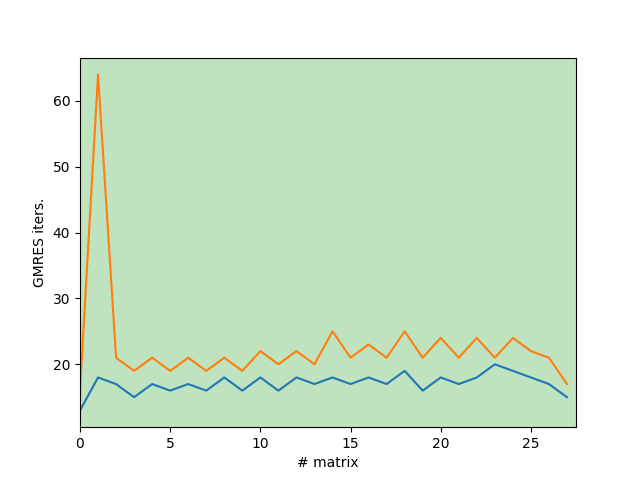

In [2]:
%matplotlib widget
def gmres_iters():
    color_converged_reason(dataset["baseline"], legend=False)
    for name, data in dataset.items():
        plt.plot(get_gmres_iterations(data), label=name)
        plt.ylabel("GMRES iters.")
        plt.xlabel("# matrix")


gmres_iters()

In [3]:
from mat_utils import *
from plot_utils import *
from fpm_0 import make_model


model = make_model()
model.prepare_simulation()
model.before_nonlinear_loop()
model.before_nonlinear_iteration()

In [4]:
def F_cond():
    color_converged_reason(dataset['baseline'], legend=False)
    for name, data in dataset.items():
        plt.plot(get_F_cond(data, model), label=name)
        plt.ylabel('F cond')
        plt.xlabel('# matrix')
        plt.yscale('log')
    # plt.legend()
        
def S_Ap():
    color_converged_reason(dataset['baseline'], legend=False)
    for name, data in dataset.items():
        plt.plot(get_S_Ap_cond(data, model), label=name)
        plt.ylabel('S_Ap cond')
        plt.xlabel('# matrix')
        plt.yscale('log')
    # plt.legend()
        

def Bp():
    color_converged_reason(dataset['baseline'], legend=False)
    for name, data in dataset.items():
        plt.plot(get_Bp_cond(data, model), label=name)
        plt.ylabel('Bp cond')
        plt.xlabel('# matrix')
        plt.yscale('log')
    # plt.legend()
        
def Omega_p():
    color_converged_reason(dataset['baseline'], legend=False)
    for name, data in dataset.items():
        plt.plot(get_Omega_p_cond(data, model), label=name)
        plt.ylabel('Omega_p cond')
        plt.xlabel('# matrix')
        plt.yscale('log')
    # plt.legend()
        
def jacobian():
    color_converged_reason(dataset['baseline'], legend=False)
    for name, data in dataset.items():
        plt.plot(get_jacobian_cond(data, model), label=name)
        plt.ylabel('jacobian cond')
        plt.xlabel('# matrix')
        plt.yscale('log')
    # plt.legend()

/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


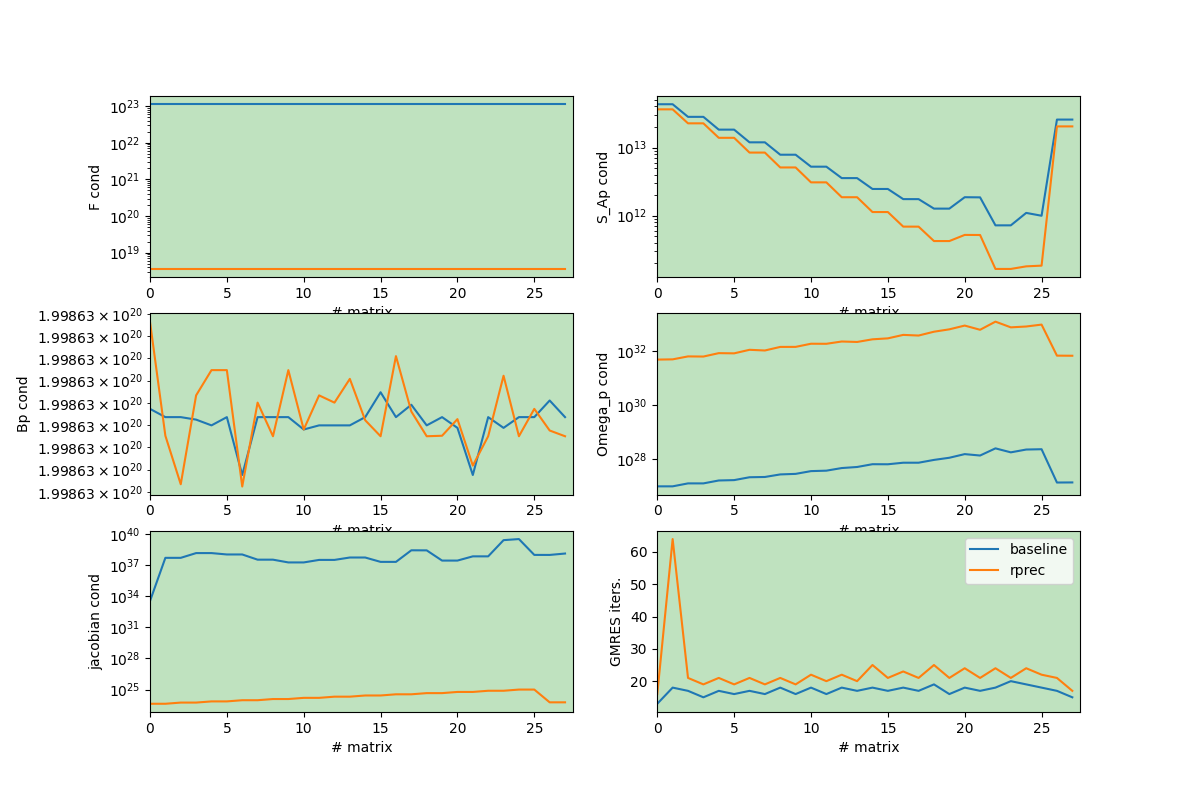

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
F_cond()

plt.subplot(3, 2, 2)
S_Ap()

plt.subplot(3, 2, 3)
Bp()

plt.subplot(3, 2, 4)
Omega_p()

plt.subplot(3, 2, 5)
jacobian()

plt.subplot(3, 2, 6)
gmres_iters()

plt.legend()